In [2]:
!pip3 install numpy

In [3]:
!pip3 install opencv-python

In [4]:
!pip3 install matplotlib

In [5]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
img = cv2.imread('./test_images/download (1) copy.jpeg')
img.shape

(259, 194, 3)

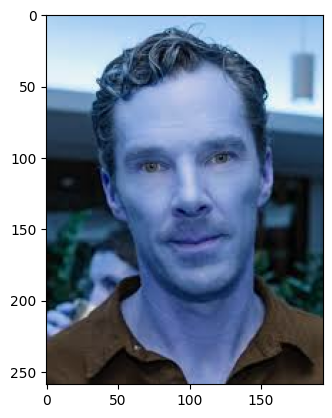

In [7]:
plt.imshow(img)

In [8]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(259, 194)

In [9]:
gray

array([[214, 214, 214, ..., 200, 200, 200],
       [215, 215, 214, ..., 200, 200, 200],
       [215, 215, 215, ..., 201, 201, 201],
       ...,
       [ 32,  37,  42, ...,  65,  63,  63],
       [ 30,  35,  40, ...,  65,  60,  60],
       [ 26,  31,  36, ...,  64,  57,  57]], shape=(259, 194), dtype=uint8)

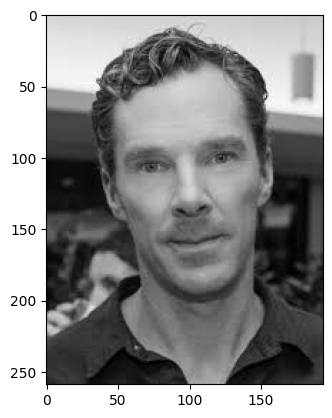

In [10]:
plt.imshow(gray, cmap='gray')

In [11]:
face_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[ 35,  53, 130, 130]], dtype=int32)

In [12]:
(x,y,w,h) = faces[0]
x,y,w,h

(np.int32(35), np.int32(53), np.int32(130), np.int32(130))

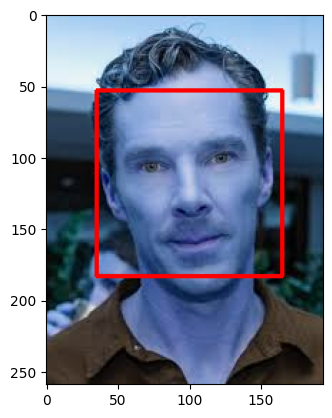

In [13]:
face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
plt.imshow(face_img)

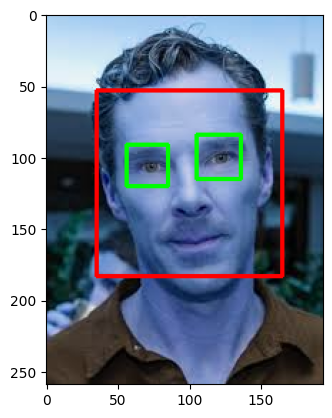

In [14]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = face_img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,255,0),2)
        

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

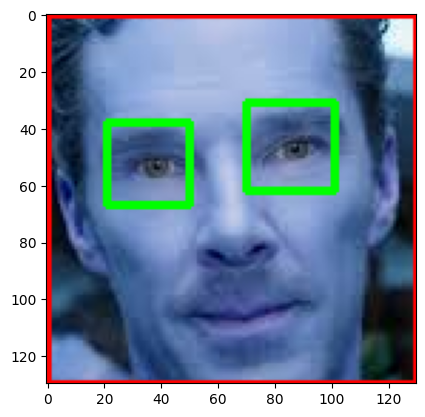

In [15]:
%matplotlib inline
plt.imshow(roi_color, cmap='gray')

In [16]:
def get_cropped_image_if_2_eyes(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x,y,w,h) in faces:
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        if len(eyes) >= 2:
            return roi_color

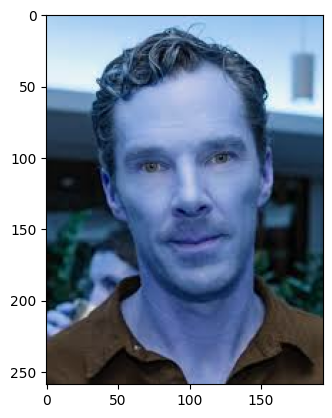

In [17]:
original_image = cv2.imread('./test_images/download (1) copy.jpeg')
plt.imshow(original_image)

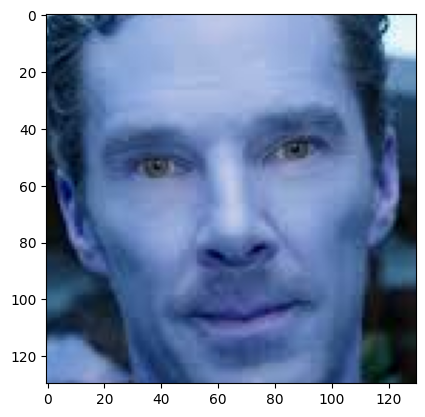

In [18]:
cropped_image = get_cropped_image_if_2_eyes('./test_images/download (1) copy.jpeg')
plt.imshow(cropped_image)

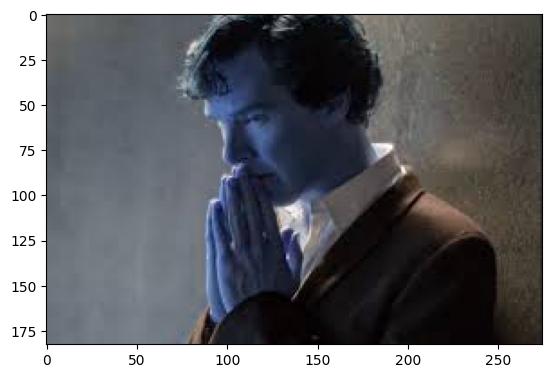

In [19]:
org_image_obstructed = cv2.imread('./test_images/test_image_2.jpeg')
plt.imshow(org_image_obstructed)

In [20]:
cropped_image_no_2_eyes = get_cropped_image_if_2_eyes('./test_images/test_image_2.jpeg')
cropped_image_no_2_eyes

In [27]:
path_to_data = "./dataset/"
path_to_cr_data = "./dataset/cropped/"

In [28]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [29]:
img_dirs

['./dataset/Chris Evans ',
 './dataset/Robert Downey Jr.',
 './dataset/Benedict Cumberbatch',
 './dataset/Scarlett Johansson',
 './dataset/Tom Holland']

In [41]:
import shutil
if os.path.exists(path_to_cr_data):
    shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [42]:
cropped_image_dirs = []
celebrity_file_names_dict = {}

for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    print(celebrity_name)

    celebrity_file_names_dict[celebrity_name] = []
    
    for entry in os.scandir(img_dir):
        if entry.name.lower().endswith(('.png', '.jpg', '.jpeg')):
            roi_color = get_cropped_image_if_2_eyes(entry.path)
            if roi_color is not None:
                cropped_folder = path_to_cr_data + celebrity_name
                if not os.path.exists(cropped_folder):
                    os.makedirs(cropped_folder)
                    cropped_image_dirs.append(cropped_folder)
                    print("Generating cropped images in folder: ",cropped_folder)
                    
                cropped_file_name = celebrity_name + str(count) + ".jpeg"
                cropped_file_path = cropped_folder + "/" + cropped_file_name

                cv2.imwrite(cropped_file_path, roi_color)
                celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
                count += 1

Chris Evans 
Generating cropped images in folder:  ./dataset/cropped/Chris Evans 
Robert Downey Jr.
Generating cropped images in folder:  ./dataset/cropped/Robert Downey Jr.
Benedict Cumberbatch
Generating cropped images in folder:  ./dataset/cropped/Benedict Cumberbatch
Scarlett Johansson
Generating cropped images in folder:  ./dataset/cropped/Scarlett Johansson
Tom Holland
Generating cropped images in folder:  ./dataset/cropped/Tom Holland


In [48]:
%pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 5.1 MB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [49]:
import numpy as np
import pywt
import cv2

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray = np.float32(imArray)
    imArray /= 255;
    # compute coefficients
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)
    coeffs_H[0] *= 0;

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

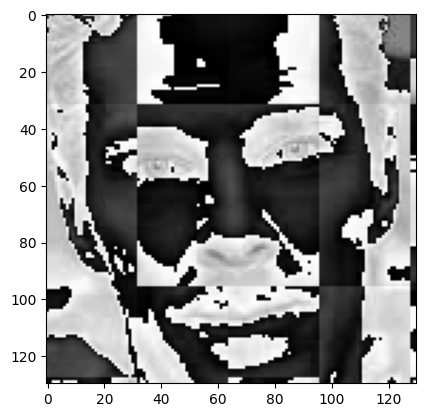

In [51]:
im_har = w2d(cropped_image,'db1',5)
plt.imshow(im_har, cmap='gray')

In [ ]:
celebrity_file_names_dict